## Heat Map

In [2]:
import pandas as pd 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

## Load Data

In [3]:
df= pd.read_csv("./data/events_pass_simple.csv")

In [4]:
df

,period,team,type,x_start,y_start,x_end,y_end
0,1,Tottenham Hotspur,Pass,61.0,40.1,34.7,40.4
1,1,Tottenham Hotspur,Pass,39.2,43.1,81.1,68.3
2,1,Arsenal,Pass,44.2,0.1,79.8,6.8
3,1,Tottenham Hotspur,Pass,40.3,73.3,52.4,75.4
4,1,Tottenham Hotspur,Pass,52.4,75.4,60.9,67.8
...,...,...,...,...,...,...,...
897,2,Arsenal,Pass,15.4,53.0,75.5,71.8
898,2,Tottenham Hotspur,Pass,52.9,7.3,71.0,4.0
899,2,Tottenham Hotspur,Pass,88.4,0.1,80.2,3.6
900,2,Tottenham Hotspur,Pass,76.2,5.2,106.0,33.3


## Filter

### Second Half Only

In [5]:
df= df[ df.period==2] 

### Tottenham Hotspur

In [6]:
df_tottenham= df[df.team=="Tottenham Hotspur"]

### Arsenal

In [7]:
df_arsenal= df[df.team=="Arsenal"]

## Heat Map 

In [8]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
%config inlineBackend.figure_format='retina'
from mplsoccer import Pitch, VerticalPitch

In [10]:
custom_cmap= matplotlib.colors.LinearSegmentedColormap.from_list("custom_cmap", ["red", "black"])

In [11]:
def heatmap(df): 

    pitch=Pitch(
        pitch_type="statsbomb", 
        line_zorder=100,
        pitch_color="grass", stripe=True,
        line_color="white"
    )

    fig, ax= pitch.draw()

    pitch.kdeplot(
        x=df.x_start, y=df.y_start, ax=ax, 
        fill=True, 
        cmap=custom_cmap 
    )

    plt.show()

## Tottenham Hotspur

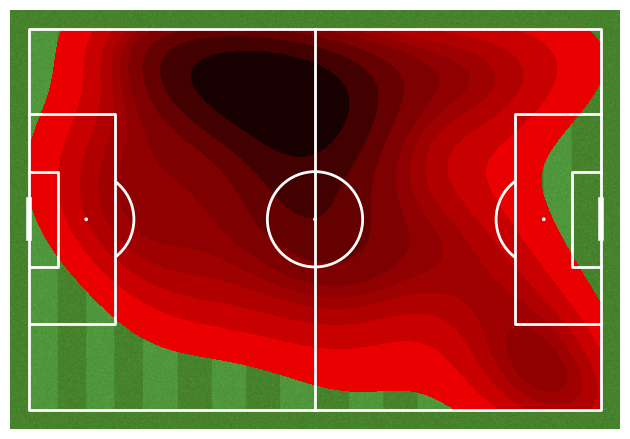

In [12]:
heatmap(df_tottenham)

## Arsenal

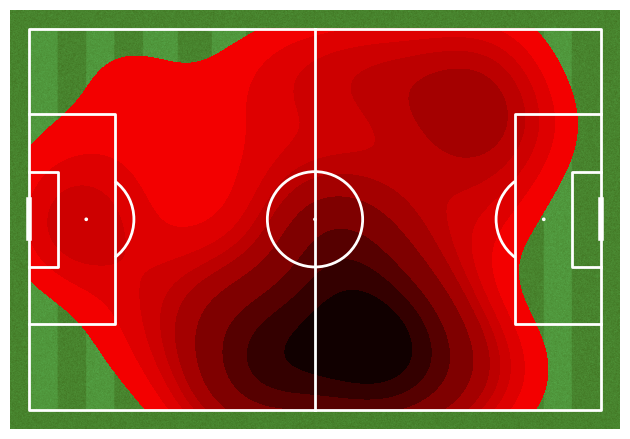

In [13]:
heatmap(df_arsenal)

## Both 

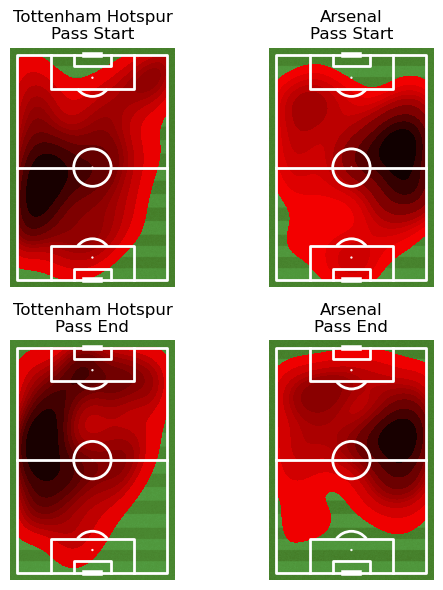

In [16]:
pitch= VerticalPitch(
    pitch_type="statsbomb", 
    line_zorder=100, 
    pitch_color="grass", stripe= True, 
    line_color="white"
) 

fig, ax= pitch.draw(nrows=2, ncols=2, figsize=(6, 6))

pitch.kdeplot(
    x=df_tottenham.x_start, y=df_tottenham.y_start, ax=ax[0][0],
    fill= True, 
    cmap= custom_cmap
) 

pitch.kdeplot( 
    x=df_arsenal.x_start, y=df_arsenal.y_start, ax=ax[0][1], 
    fill=True, 
    cmap=custom_cmap 
) 

pitch.kdeplot(
    x=df_tottenham.x_end, y=df_tottenham.y_end, ax=ax[1][0], 
    fill= True, 
    cmap= custom_cmap
) 

pitch.kdeplot(
    x=df_arsenal.x_end, y=df_arsenal.y_end, ax=ax[1][1],
    fill= True, 
    cmap= custom_cmap
) 

for i, team in enumerate(["Tottenham Hotspur", "Arsenal"]):
    for j, pos in enumerate(["Pass Start", "Pass End"]):
        ax[j][i].set_title(f"{team}\n{pos}") 

# ax[0][0].set_title("Tottenham Hotspur\nPass Start")
# ax[0][1].set_title("Arsenal\nPass Start")

plt.tight_layout()
plt.show()